In [1]:
import sys
import json
import csv
import yaml

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv

import time
from datetime import datetime

import pprint

import psycopg2
from sqlalchemy import create_engine, text as sql_text

In [2]:
import benchmarking.util as util

## 3a Visualizations

In [3]:
with open('perf_data/listings_join_reviews.json', 'r') as file:
    data_listings_3a = json.load(file)

# Printing the loaded file
print(json.dumps(data_listings_3a, indent=4, sort_keys=True))

{
    "listings_join_review_2009": {
        "__": {
            "avg": 0.5095,
            "exec_count": 50,
            "max": 2.4342,
            "min": 0.2413,
            "std": 0.5282,
            "timestamp": "2024-05-23T00:43:50.071324"
        },
        "__datetime_in_reviews__": {
            "avg": 0.2823,
            "exec_count": 50,
            "max": 0.3722,
            "min": 0.2481,
            "std": 0.0249,
            "timestamp": "2024-05-23T00:44:04.823067"
        },
        "__datetime_in_reviews__id_in_listings__": {
            "avg": 0.2628,
            "exec_count": 50,
            "max": 0.3136,
            "min": 0.2379,
            "std": 0.0174,
            "timestamp": "2024-05-23T00:44:32.401315"
        },
        "__id_in_listings__": {
            "avg": 0.2811,
            "exec_count": 50,
            "max": 0.4531,
            "min": 0.2358,
            "std": 0.0435,
            "timestamp": "2024-05-23T00:44:18.899560"
        }
    },
    "li

In [4]:
pp = pprint.PrettyPrinter(indent=4)
data_listings_renamed_3a = util.rename_keys(data_listings_3a)

pp.pprint(data_listings_renamed_3a)

{   '2009': {   '__': {   'avg': 0.5095,
                          'exec_count': 50,
                          'max': 2.4342,
                          'min': 0.2413,
                          'std': 0.5282,
                          'timestamp': '2024-05-23T00:43:50.071324'},
                '__datetime_in_reviews__': {   'avg': 0.2823,
                                               'exec_count': 50,
                                               'max': 0.3722,
                                               'min': 0.2481,
                                               'std': 0.0249,
                                               'timestamp': '2024-05-23T00:44:04.823067'},
                '__datetime_in_reviews__id_in_listings__': {   'avg': 0.2628,
                                                               'exec_count': 50,
                                                               'max': 0.3136,
                                                               'min': 0.2379,
   

In [ ]:


# Extract the avg values
avg_values_3a = util.extract_avg_values(data_listings_renamed_3a)

pp.pprint(avg_values_3a)

# Map the keys to the custom labels
key_labels_3a = {
    "__": "no_index",
    "__datetime_in_reviews__": "datetime_index",
    "__id_in_listings__": "id_index",
    "__datetime_in_reviews__id_in_listings__": "datetime_and_id_index"
}

# Prepare data for DataFrame
data_for_df_3a = {label: [] for label in key_labels_3a.values()}
data_for_df_3a['Year'] = sorted(avg_values_3a.keys())

for year in data_for_df_3a['Year']:
    for key, label in key_labels_3a.items():
        data_for_df_3a[label].append(avg_values_3a[year].get(key, None))

# Create DataFrame
df_3a = pd.DataFrame(data_for_df_3a)

# Set 'Year' as the index
df_3a.set_index('Year', inplace=True)

# Display the DataFrame
print(df_3a)

In [ ]:
# Plotting the data
plt.figure(figsize=(12, 8))

# Plot each category data
for label in key_labels_3a.values():
    plt.plot(df_3a.index, df_3a[label], marker='o', label=label)
    
colors = ['red', 'green', 'blue', 'purple']

# Calculate and plot average lines for each index across all years
for idx, label in enumerate(key_labels_3a.values()):
    avg_value_3a = df_3a[label].mean()
    plt.axhline(y=avg_value_3a, linestyle='--', color=colors[idx], label=f'Average {label}')

plt.title('Listings Join Reviews Average Values per Year Ruhi_Aggarwal_4800')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Extract the avg values
std_values_3a = util.extract_std_values(data_listings_renamed_3a)

pp.pprint(std_values_3a)

# Map the keys to the custom labels
# key_labels_3a = {
#     "__": "no_index",
#     "__datetime_in_reviews__": "datetime_index",
#     "__id_in_listings__": "id_index",
#     "__datetime_in_reviews__id_in_listings__": "datetime_and_id_index"
# }

# Prepare data for DataFrame
data_for_df_std_3a = {label: [] for label in key_labels_3a.values()}
data_for_df_std_3a['Year'] = sorted(std_values_3a.keys())

for year in data_for_df_std_3a['Year']:
    for key, label in key_labels_3a.items():
        data_for_df_std_3a[label].append(std_values_3a[year].get(key, None))

# Create DataFrame
df_std_3a = pd.DataFrame(data_for_df_std_3a)

# Set 'Year' as the index
df_std_3a.set_index('Year', inplace=True)

# Display the DataFrame
print(df_std_3a)

In [ ]:
# Plotting the data
plt.figure(figsize=(12, 8))

# Plot each category data
for label in key_labels_3a.values():
    plt.plot(df_std_3a.index, df_std_3a[label], marker='o', label=label)
    
colors = ['red', 'green', 'blue', 'purple']

# Calculate and plot average lines for each index across all years
for idx, label in enumerate(key_labels_3a.values()):
    std_value = df_std_3a[label].std()
    plt.axhline(y=std_value, linestyle='--', color=colors[idx], label=f'STD {label}')

plt.title('Listings Join Reviews STD Values per Year Ruhi_Aggarwal_4800')
plt.xlabel('Year')
plt.ylabel('Standard Deviation Value')
plt.legend()
plt.grid(True)
plt.show()

## 3b Visualizations

In [ ]:
with open('perf_data/text_search_query.json', 'r') as file:
    data_listings_3b = json.load(file)

# Printing the loaded file
print(json.dumps(data_listings_3b, indent=4, sort_keys=True))

In [ ]:
pp = pprint.PrettyPrinter(indent=4)

horrible_data = util.rename_keys_by_word(data_listings_3b, 'horrible')
awesome_data = util.rename_keys_by_word(data_listings_3b, 'awesome')
apartment_data = util.rename_keys_by_word(data_listings_3b, 'apartment')

pp.pprint(horrible_data)
pp.pprint(awesome_data)
pp.pprint(apartment_data)

In [ ]:


# Extract the avg values
avg_values_awesome = util.extract_avg_values(awesome_data)
avg_values_horrible = util.extract_avg_values(horrible_data)
avg_values_apartment = util.extract_avg_values(apartment_data)

pp.pprint(avg_values_awesome)
pp.pprint(avg_values_horrible)
pp.pprint(avg_values_apartment)

# Map the keys to the custom labels
key_labels_3b = {
    "__": "no_index",
    "__datetime_in_reviews__": "datetime_index",
    "__comments_tsv_in_reviews__": "comments_index",
    "__datetime_in_reviews__comments_tsv_in_reviews__": "datetime_and_comments_index"
}

# Prepare data for DataFrame
data_for_df_3c = {label: [] for label in key_labels_3c.values()}
data_for_df_3c['Year'] = sorted(avg_values_3c.keys())

for year in data_for_df_awesome['Year']:
    for key, label in key_labels_3b.items():
        data_for_df_awesome[label].append(avg_values_awesome[year].get(key, None))
        
for year in data_for_df_horrible['Year']:
    for key, label in key_labels_3b.items():
        data_for_df_horrible[label].append(avg_values_horrible[year].get(key, None))
        
for year in data_for_df_apartment['Year']:
    for key, label in key_labels_3b.items():
        data_for_df_apartment[label].append(avg_values_apartment[year].get(key, None))
        


# Create DataFrame
df_awesome = pd.DataFrame(data_for_df_awesome)
df_horrible = pd.DataFrame(data_for_df_horrible)
df_apartment = pd.DataFrame(data_for_df_apartment)

# Set 'Year' as the index
df_awesome.set_index('Year', inplace=True)
df_horrible.set_index('Year', inplace=True)
df_apartment.set_index('Year', inplace=True)

# Display the DataFrame
print(df_awesome)
print(df_horrible)
print(df_apartment)

In [ ]:
# Plotting the data
plt.figure(figsize=(12, 8))

# Plot each category data
for label in key_labels_3b.values():
    plt.plot(df_awesome.index, df_awesome[label], marker='o', label=label)
    
colors = ['red', 'green', 'blue', 'purple']

# Calculate and plot average lines for each index across all years
for idx, label in enumerate(key_labels_3b.values()):
    avg_value_awesome = df_awesome[label].mean()

plt.title('Text Search AWESOME Average Values per Year Ruhi_Aggarwal_4800')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Plotting the data
plt.figure(figsize=(12, 8))

# Plot each category data
for label in key_labels_3b.values():
    plt.plot(df_horrible.index, df_horrible[label], marker='o', label=label)
    
colors = ['red', 'green', 'blue', 'purple']

# Calculate and plot average lines for each index across all years
for idx, label in enumerate(key_labels_3b.values()):
    avg_value_horrible = df_horrible[label].mean()
    plt.axhline(y=avg_value_horrible, linestyle='--', color=colors[idx], label=f'Average {label}')

plt.title('Text Search HORRIBLE Average Values per Year Ruhi_Aggarwal_4800')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Plotting the data
plt.figure(figsize=(12, 8))

# Plot each category data
for label in key_labels_3b.values():
    plt.plot(df_apartment.index, df_apartment[label], marker='o', label=label)
    
colors = ['red', 'green', 'blue', 'purple']

# Calculate and plot average lines for each index across all years
for idx, label in enumerate(key_labels_3b.values()):
    avg_value_apartment = df_apartment[label].mean()
    plt.axhline(y=avg_value_apartment, linestyle='--', color=colors[idx], label=f'Average {label}')

plt.title('Text Search APARTMENT Average Values per Year Ruhi_Aggarwal_4800')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:


# Extract the std values
std_values_awesome = util.extract_std_values(awesome_data)
std_values_horrible = util.extract_std_values(horrible_data)
std_values_apartment = util.extract_std_values(apartment_data)

pp.pprint(std_values_awesome)
pp.pprint(std_values_horrible)
pp.pprint(std_values_apartment)

# Prepare data for DataFrame
data_for_df_awesome_std = {label: [] for label in key_labels_3b.values()}
data_for_df_awesome_std['Year'] = sorted(avg_values_awesome.keys())
data_for_df_horrible_std = {label: [] for label in key_labels_3b.values()}
data_for_df_horrible_std['Year'] = sorted(avg_values_horrible.keys())
data_for_df_apartment_std = {label: [] for label in key_labels_3b.values()}
data_for_df_apartment_std['Year'] = sorted(avg_values_apartment.keys())

for year in data_for_df_awesome_std['Year']:
    for key, label in key_labels_3b.items():
        data_for_df_awesome_std[label].append(std_values_awesome[year].get(key, None))
        
for year in data_for_df_horrible_std['Year']:
    for key, label in key_labels_3b.items():
        data_for_df_horrible_std[label].append(std_values_horrible[year].get(key, None))
        
for year in data_for_df_apartment_std['Year']:
    for key, label in key_labels_3b.items():
        data_for_df_apartment_std[label].append(std_values_apartment[year].get(key, None))
        


# Create DataFrame
df_awesome_std = pd.DataFrame(data_for_df_awesome_std)
df_horrible_std = pd.DataFrame(data_for_df_horrible_std)
df_apartment_std = pd.DataFrame(data_for_df_apartment_std)

# Set 'Year' as the index
df_awesome_std.set_index('Year', inplace=True)
df_horrible_std.set_index('Year', inplace=True)
df_apartment_std.set_index('Year', inplace=True)

# Display the DataFrame
print(df_awesome_std)
print(df_horrible_std)
print(df_apartment_std)

In [ ]:
# Plotting the data
plt.figure(figsize=(12, 8))

# Plot each category data
for label in key_labels_3b.values():
    plt.plot(df_awesome_std.index, df_awesome_std[label], marker='o', label=label)
    
colors = ['red', 'green', 'blue', 'purple']

# Calculate and plot average lines for each index across all years
for idx, label in enumerate(key_labels_3b.values()):
    std_values_awesome = df_awesome_std[label].mean()
    plt.axhline(y=std_values_awesome, linestyle='--', color=colors[idx], label=f'STD {label}')

plt.title('Text Search AWESOME STD Values per Year Ruhi_Aggarwal_4800')
plt.xlabel('Year')
plt.ylabel('STD Value')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Plotting the data
plt.figure(figsize=(12, 8))

# Plot each category data
for label in key_labels_3b.values():
    plt.plot(df_horrible_std.index, df_horrible_std[label], marker='o', label=label)
    
colors = ['red', 'green', 'blue', 'purple']

# Calculate and plot average lines for each index across all years
for idx, label in enumerate(key_labels_3b.values()):
    std_values_horrible = df_horrible_std[label].mean()
    plt.axhline(y=std_values_horrible, linestyle='--', color=colors[idx], label=f'STD {label}')

plt.title('Text Search HORRIBLE STD Values per Year Ruhi_Aggarwal_4800')
plt.xlabel('Year')
plt.ylabel('STD Value')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Plotting the data
plt.figure(figsize=(12, 8))

# Plot each category data
for label in key_labels_3b.values():
    plt.plot(df_apartment_std.index, df_apartment_std[label], marker='o', label=label)
    
colors = ['red', 'green', 'blue', 'purple']

# Calculate and plot average lines for each index across all years
for idx, label in enumerate(key_labels_3b.values()):
    std_values_apartment = df_apartment_std[label].mean()
    plt.axhline(y=std_values_apartment, linestyle='--', color=colors[idx], label=f'STD {label}')

plt.title('Text Search APARTMENT STD Values per Year Ruhi_Aggarwal_4800')
plt.xlabel('Year')
plt.ylabel('STD Value')
plt.legend()
plt.grid(True)
plt.show()

## 3c Visualizations

In [5]:
with open('perf_data/update_datetimes_query.json', 'r') as file:
    data_listings_3a = json.load(file)

# Printing the loaded file
print(json.dumps(data_listings_3a, indent=4, sort_keys=True))

{
    "update_datetimes_query_Bedford-Stuyvesan": {
        "__": {
            "avg": 0.9486,
            "exec_count": 20,
            "max": 0.9763,
            "min": 0.9405,
            "std": 0.0087,
            "timestamp": "2024-05-24T02:54:57.977741"
        },
        "__datetime_in_reviews__": {
            "avg": 0.9441,
            "exec_count": 20,
            "max": 0.9573,
            "min": 0.94,
            "std": 0.0049,
            "timestamp": "2024-05-24T02:55:17.376379"
        },
        "__datetime_in_reviews__neigh_in_listings__": {
            "avg": 0.9432,
            "exec_count": 20,
            "max": 0.9608,
            "min": 0.9364,
            "std": 0.0074,
            "timestamp": "2024-05-24T02:55:55.621876"
        },
        "__neigh_in_listings__": {
            "avg": 0.9429,
            "exec_count": 20,
            "max": 0.9534,
            "min": 0.9381,
            "std": 0.0048,
            "timestamp": "2024-05-24T02:55:36.264055"
     

In [6]:
data_listings_renamed_3c = util.rename_keys_3c(data_listings_3a)

pp.pprint(data_listings_renamed_3c)

{   'Bedford-Stuyvesan': {   '__': {   'avg': 0.9486,
                                       'exec_count': 20,
                                       'max': 0.9763,
                                       'min': 0.9405,
                                       'std': 0.0087,
                                       'timestamp': '2024-05-24T02:54:57.977741'},
                             '__datetime_in_reviews__': {   'avg': 0.9441,
                                                            'exec_count': 20,
                                                            'max': 0.9573,
                                                            'min': 0.94,
                                                            'std': 0.0049,
                                                            'timestamp': '2024-05-24T02:55:17.376379'},
                             '__datetime_in_reviews__neigh_in_listings__': {   'avg': 0.9432,
                                                                      

In [7]:
# Extract the avg values
avg_values_3c = util.extract_avg_values(data_listings_renamed_3c)

pp.pprint(avg_values_3c)

# Map the keys to the custom labels
key_labels_3c = {
    "__": "no_index",
    "__datetime_in_reviews__": "datetime_index",
    "__neigh_group_in_listings__": "neighbourhood_index",
    "__datetime_in_reviews__neigh_in_listings__": "datetime_and_neighbourhood_index"
}

# Prepare data for DataFrame
data_for_df_3c = {label: [] for label in key_labels_3c.values()}
data_for_df_3c['Neighbourhood'] = sorted(avg_values_3c.keys())

for neigh in data_for_df_3c['Neighbourhood']:
    for key, label in key_labels_3c.items():
        data_for_df_3c[label].append(avg_values_3c[neigh].get(key, None))

# Create DataFrame
df_3c = pd.DataFrame(data_for_df_3c)

# Set 'Year' as the index
df_3c.set_index('Neighbourhood', inplace=True)

# Display the DataFrame
print(df_3c)

{   'Bedford-Stuyvesan': {   '__': 0.9486,
                             '__datetime_in_reviews__': 0.9441,
                             '__datetime_in_reviews__neigh_in_listings__': 0.9432,
                             '__neigh_in_listings__': 0.9429},
    'Bronx': {   '__': 1061.9544,
                 '__datetime_in_reviews__': 1070.4938,
                 '__datetime_in_reviews__neigh_in_listings__': 1065.5465,
                 '__neigh_in_listings__': 1070.5042},
    'Fort Hamilton': {   '__': 5.5815,
                         '__datetime_in_reviews__': 5.6216,
                         '__datetime_in_reviews__neigh_in_listings__': 5.504,
                         '__neigh_in_listings__': 5.5995},
    'Long Island City': {   '__': 43.6933,
                            '__datetime_in_reviews__': 43.7621,
                            '__datetime_in_reviews__neigh_in_listings__': 43.5815,
                            '__neigh_in_listings__': 43.77},
    'Manhattan': {   '__': 1004.2492,
     

In [9]:
new_order = ['New Springville', 'Fort Hamilton', 'Long Island City', 'Bedford-Stuyvesan', 'Staten Island', 'Bronx', 'Queens', 'Manhattan']

df_3c = df_3c.loc[new_order].reset_index(drop=False)

print(df_3c)

       Neighbourhood   no_index  datetime_index neighbourhood_index  \
0    New Springville     1.8064          1.5590                None   
1      Fort Hamilton     5.5815          5.6216                None   
2   Long Island City    43.6933         43.7621                None   
3  Bedford-Stuyvesan     0.9486          0.9441                None   
4      Staten Island   277.6595        337.4336                None   
5              Bronx  1061.9544       1070.4938                None   
6             Queens  1061.9544       1161.9427                None   
7          Manhattan  1004.2492       1049.2849                None   

   datetime_and_neighbourhood_index  
0                            1.3830  
1                            5.5040  
2                           43.5815  
3                            0.9432  
4                          863.9698  
5                         1065.5465  
6                         1361.2454  
7                         1053.4829  


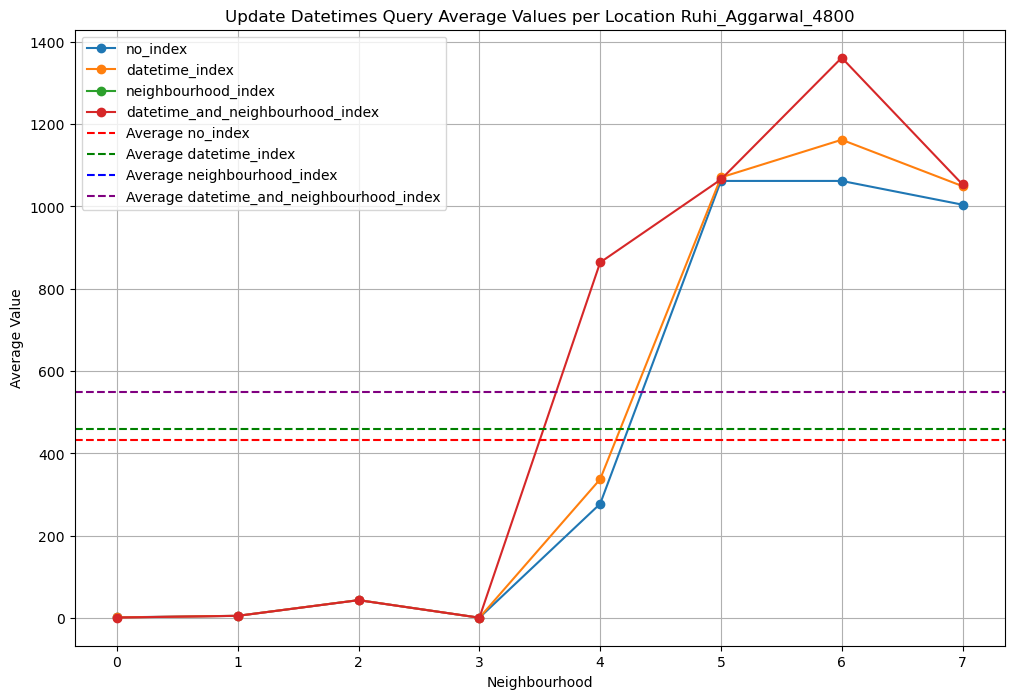

In [10]:
plt.figure(figsize=(12, 8))

# Plot each category data
for label in key_labels_3c.values():
    plt.plot(df_3c.index, df_3c[label], marker='o', label=label)
    
colors = ['red', 'green', 'blue', 'purple']

# Calculate and plot average lines for each index across all years
for idx, label in enumerate(key_labels_3c.values()):
    avg_value_3c = df_3c[label].mean()
    plt.axhline(y=avg_value_3c, linestyle='--', color=colors[idx], label=f'Average {label}')

plt.title('Update Datetimes Query Average Values per Location Ruhi_Aggarwal_4800')
plt.xlabel('Neighbourhood')
plt.ylabel('Average Value')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
std_values_3c = util.extract_std_values(data_listings_renamed_3c)

pp.pprint(std_values_3c)

# Prepare data for DataFrame
data_for_df_3c_std = {label: [] for label in key_labels_3c.values()}
data_for_df_3c_std['Neighbourhood'] = sorted(std_values_3c.keys())

for neigh in data_for_df_3c_std['Neighbourhood']:
    for key, label in key_labels_3c.items():
        data_for_df_3c_std[label].append(std_values_3c[neigh].get(key, None))

# Create DataFrame
df_3c_std = pd.DataFrame(data_for_df_3c_std)

# Set 'Year' as the index
df_3c_std.set_index('Neighbourhood', inplace=True)

# Display the DataFrame
print(df_3c_std)

{   'Bedford-Stuyvesan': {   '__': 0.0087,
                             '__datetime_in_reviews__': 0.0049,
                             '__datetime_in_reviews__neigh_in_listings__': 0.0074,
                             '__neigh_in_listings__': 0.0048},
    'Bronx': {   '__': 405.7123,
                 '__datetime_in_reviews__': 395.7251,
                 '__datetime_in_reviews__neigh_in_listings__': 400.7629,
                 '__neigh_in_listings__': 400.936},
    'Fort Hamilton': {   '__': 0.1283,
                         '__datetime_in_reviews__': 0.2212,
                         '__datetime_in_reviews__neigh_in_listings__': 0.0976,
                         '__neigh_in_listings__': 0.1364},
    'Long Island City': {   '__': 0.5218,
                            '__datetime_in_reviews__': 0.0677,
                            '__datetime_in_reviews__neigh_in_listings__': 0.2892,
                            '__neigh_in_listings__': 0.0503},
    'Manhattan': {   '__': 515.3949,
            

In [13]:
new_order = ['New Springville', 'Fort Hamilton', 'Long Island City', 'Bedford-Stuyvesan', 'Staten Island', 'Bronx', 'Queens', 'Manhattan']

df_3c_std = df_3c_std.loc[new_order].reset_index(drop=False)

print(df_3c_std)

       Neighbourhood  no_index  datetime_index neighbourhood_index  \
0    New Springville    1.5199          0.2240                None   
1      Fort Hamilton    0.1283          0.2212                None   
2   Long Island City    0.5218          0.0677                None   
3  Bedford-Stuyvesan    0.0087          0.0049                None   
4      Staten Island    4.5607          1.9410                None   
5              Bronx  405.7123        395.7251                None   
6             Queens  402.7123        102.3429                None   
7          Manhattan  515.3949        224.3949                None   

   datetime_and_neighbourhood_index  
0                            0.2131  
1                            0.0976  
2                            0.2892  
3                            0.0074  
4                         2255.4056  
5                          400.7629  
6                          207.1949  
7                          212.4930  


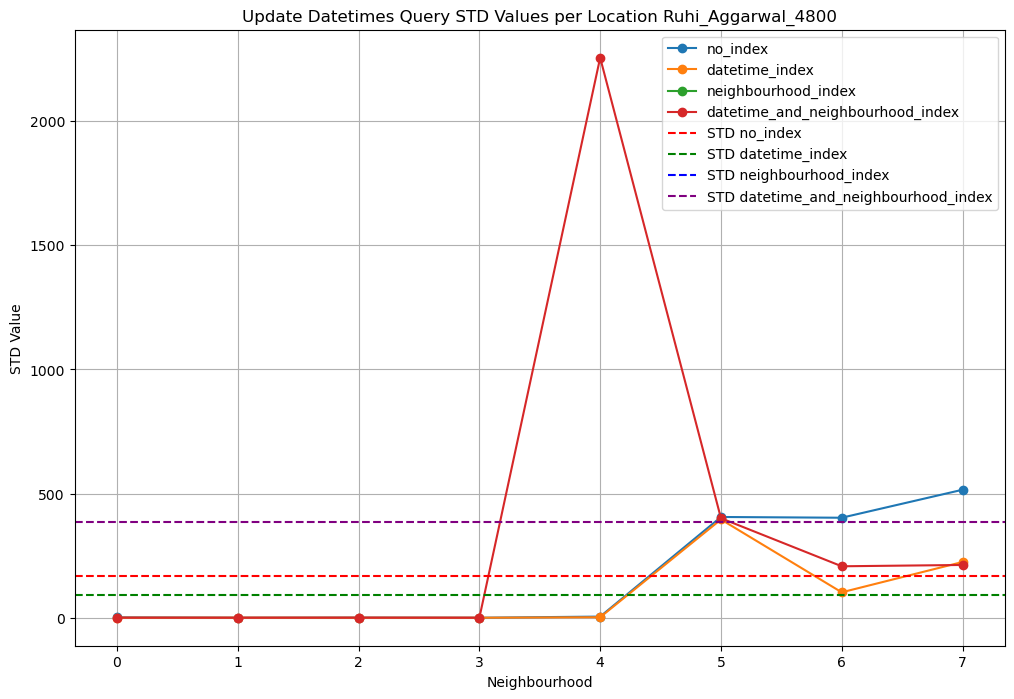

In [14]:
plt.figure(figsize=(12, 8))

# Plot each category data
for label in key_labels_3c.values():
    plt.plot(df_3c_std.index, df_3c_std[label], marker='o', label=label)
    
colors = ['red', 'green', 'blue', 'purple']

# Calculate and plot average lines for each index across all years
for idx, label in enumerate(key_labels_3c.values()):
    std_value_3c = df_3c_std[label].mean()
    plt.axhline(y=std_value_3c, linestyle='--', color=colors[idx], label=f'STD {label}')

plt.title('Update Datetimes Query STD Values per Location Ruhi_Aggarwal_4800')
plt.xlabel('Neighbourhood')
plt.ylabel('STD Value')
plt.legend()
plt.grid(True)
plt.show()